# Analysis on Indian startup ecosystem

## Business Understanding

### Project Description

In this project, we aim to analyze the trends and patterns in startup funding received by companies in India from 2018 to 2021. The dataset consists of separate CSV files for each year from various sources and database containing details about Indias startup funding, including the startup's information, funding amounts, and investor information. Our objectives are to uncover insights into the dynamics of startup funding, identify key factors influencing funding success, and provide actionable recommendations for startups and investors in India.

### Data Understanding

The key attributes in the dataset include:

* __Company/Brand__: Name of the company/start-up
* __Founded__: Year start-up was founded
* __Sector__: Sector of service
* __What it does__: Description about Company
* __Founders__: Founders of the Company
* __Investor__: Investors
* __Amount($)__: Raised fund
* __Stage__: Round of funding reached

### Hypothesis

### Null Hypothesis (H0): There is no significant difference in the average funding amount between the different years.
### Alternative Hypothesis (H1): There is a significant difference in the average funding amount between the different years.

### Research Questions

1. At what stage do most startups receive funding?
2. Which year had the highest amount of startup funding?
3. What are the top 3 sectors receiving the highest funding amounts in 2018, 2019, 2020 and 2021?
4. How does the total funding amount vary over the years?
5. What are the top 5 sectors receiving the highest funding amounts?

In [4]:
# import all packages to be used
import pyodbc
from dotenv import load_dotenv
import pandas as pd
import numpy as np
import os
import warnings
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')
print("Activated")

Activated


In [5]:
# Load environment variables from .env file
load_dotenv()
 
# Access environment variables
db_server = os.getenv("DB_SERVER")
db_login = os.getenv("DB_LOGIN")
db_password = os.getenv("DB_PASSWORD")
db_name = os.getenv("DB_NAME")
 
# Connection string
connection_string = f"DRIVER={{ODBC Driver 17 for SQL Server}};SERVER={db_server};DATABASE={db_name};UID={db_login};PWD={db_password}"
 

In [6]:
# Connect to the database
connection = pyodbc.connect(connection_string)

# Exploratory Data Analysis

### Load 2020 dataset from SQL database

In [7]:
# Write query to access tables from the database
query_2020 = "SELECT * FROM dbo.LP1_startup_funding2020"

# Read data from SQL into a pandas DataFrame
df_2020 = pd.read_sql(query_2020, connection)

In [8]:
# Display first 5 rows of dataset
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [9]:
# Display information about the dataframe
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.6+ KB


In [10]:
# Display summary statistics of numeric columns
df_2020.describe()

,Founded,Amount
count,842.000000,8.010000e+02
mean,2015.363420,1.130430e+08
std,4.097909,2.476635e+09
min,1973.000000,1.270000e+04
25%,2014.000000,1.000000e+06
50%,2016.000000,3.000000e+06
75%,2018.000000,1.100000e+07
max,2020.000000,7.000000e+10


In [11]:
# Display total number of null values per column
df_2020.isnull().sum()

Company_Brand       0
Founded           213
HeadQuarter        94
Sector             13
What_it_does        0
Founders           12
Investor           38
Amount            254
Stage             464
column10         1053
dtype: int64

In [12]:
# Check for the total number of duplicate rows
df_2020.duplicated().sum()

3

In [13]:
# Display all the duplicate rows
df_2020[df_2020.duplicated(keep=False)]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
120,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
129,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
145,Krimanshi,2015.0,Jodhpur,Biotechnology company,Krimanshi aims to increase rural income by imp...,Nikhil Bohra,"Rajasthan Venture Capital Fund, AIM Smart City",600000.0,Seed,None
205,Nykaa,2012.0,Mumbai,Cosmetics,Nykaa is an online marketplace for different b...,Falguni Nayar,"Alia Bhatt, Katrina Kaif",NaN,None,None
326,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None
362,Byju’s,2011.0,Bangalore,EdTech,An Indian educational technology and online tu...,Byju Raveendran,"Owl Ventures, Tiger Global Management",500000000.0,None,None


In [14]:
# Drop duplicate rows
df_2020.drop_duplicates(inplace=True)

# Check if duplicate rows have been dropped
df_2020.duplicated().sum()

0

### We check the values in column10 and notice that its null values make up over 99% of the column. Also the other two values are the same as that of the stage column so we drop column10 as we will not be needing it.

In [15]:
# Check the values in column10
df_2020[df_2020['column10'].notnull()]

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
611,Walrus,2019.0,Bangalore,Fintech,It provides banking solutions for teens and yo...,"Bhagaban Behera, Sriharsha Shetty, Nakul Kelkar",Better Capital,NaN,Pre-Seed,Pre-Seed
613,goDutch,NaN,Mumbai,Fintech,Group Payments platform,"Aniruddh Singh, Riyaz Khan, Sagar Sheth","Matrix India, Y Combinator, Global Founders Ca...",1700000.0,Seed Round,Seed Round


In [16]:
# Drop column10
df_2020.drop('column10', axis=1, inplace=True)

# Check if column has been dropped
df_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed


In [17]:
# Create a column to keep track of the year the start_ups received funding
df_2020.insert(7,"Funding_Year", 2020)

In [18]:
# Rename columns to preferred names
df_2020.rename(columns={'Amount': 'Amount($)',
                        'Founded': 'Year_Founded'},
                         inplace=True)

# Display first 3 rows in the dataset to view renamed columns
df_2020.head(3)

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,2020,200000.0,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,2020,100000.0,Pre-seed
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,2020,NaN,Pre-seed


In [19]:
df_2020['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [20]:
# Convert the Year_Founded column to integer, treating NaN values as integers
df_2020['Year_Founded'] = df_2020['Year_Founded'].astype(float).astype('Int64')



In [21]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1052 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1052 non-null   object 
 1   Year_Founded   839 non-null    Int64  
 2   HeadQuarter    958 non-null    object 
 3   Sector         1039 non-null   object 
 4   What_it_does   1052 non-null   object 
 5   Founders       1040 non-null   object 
 6   Investor       1014 non-null   object 
 7   Funding_Year   1052 non-null   int64  
 8   Amount($)      799 non-null    float64
 9   Stage          590 non-null    object 
dtypes: Int64(1), float64(1), int64(1), object(7)
memory usage: 91.4+ KB


### Load 2021 Dataset

In [22]:
# Write query to access tables from the database
query_2021 = "SELECT * FROM dbo.LP1_startup_funding2021"

df_2021 = pd.read_sql(query_2021, connection)

In [23]:
# Display first 5 rows of dataset
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [24]:
# Display information about the dataframe
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [25]:
# Display summary statistics of numeric columns
df_2021.describe()

,Founded
count,1208.000000
mean,2016.655629
std,4.517364
min,1963.000000
25%,2015.000000
50%,2018.000000
75%,2020.000000
max,2021.000000


In [26]:
# Display total number of null values per column
df_2021.isnull().sum()

Company_Brand      0
Founded            1
HeadQuarter        1
Sector             0
What_it_does       0
Founders           4
Investor          62
Amount             3
Stage            428
dtype: int64

In [27]:
# Check for the total number of duplicate rows
df_2021.duplicated().sum()

19

In [28]:
# Drop duplicate rows
df_2021.drop_duplicates(inplace=True)

# Check if duplicate rows have been dropped
df_2021.duplicated().sum()

0

In [29]:
# Create a column to keep track of the year the start_ups received funding
df_2021.insert(7,"Funding_Year", 2021)

In [30]:
# Rename columns to preferred names
df_2021.rename(columns={'Amount': 'Amount($)',
                        'Founded': 'Year_Founded'},
                         inplace=True)

# Display first 3 rows in the dataset to view renamed columns
df_2021.head(3)

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First",2021,"$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management",2021,"$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital",2021,"$30,000,000",Series D


In [31]:
# For consistency, convert the Year_Founded column to integer, treating NaN values as integers
df_2021['Year_Founded'] = df_2021['Year_Founded'].astype(float).astype('Int64')

In [32]:
df_2021["Stage"].unique()

array(['Pre-series A', None, 'Series D', 'Series C', 'Seed', 'Series B',
       'Series E', 'Pre-seed', 'Series A', 'Pre-series B', 'Debt',
       '$1200000', 'Bridge', 'Seed+', 'Series F2', 'Series A+',
       'Series G', 'Series F', 'Series H', 'Series B3', 'PE', 'Series F1',
       'Pre-series A1', '$300000', 'Early seed', 'Series D1', '$6000000',
       '$1000000', 'Seies A', 'Pre-series', 'Series A2', 'Series I'],
      dtype=object)

### Clean Stage Column

In [33]:
# Replace missing values in the 'Stage' column with 'unknown'
df_2021['Stage'].fillna('Unknown', inplace=True)

# Filter and display values in the 'Stage' column that begin with '$
filtered_df = df_2021[df_2021['Stage'].str.startswith('$')]

# Display result
filtered_df

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",2021,Upsparks,$1200000
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,2021,ah! Ventures,$300000
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",2021,"ITO Angel Network, LetsVenture",$300000
674,MYRE Capital,2020,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,2021,None,$6000000
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,2021,"JITO Angel Network, LetsVenture",$1000000


In [34]:
# Define a function to move the misplaced values in column 'Stage' to column 'Amount($)'
def swap_values(row):
    if isinstance(row['Stage'], str) and row['Stage'].startswith('$'):
        temp = row['Amount($)']
        row['Amount($)'] = row['Stage']
        row['Stage'] = temp
    return row

# Apply function to dataframe
df_2021 = df_2021.apply(swap_values, axis=1)

# Display affected rows
rows_to_display = df_2021.iloc[[98, 519, 532, 655, 658]]
rows_to_display

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",2021,$1200000,Upsparks
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,2021,$300000,ah! Ventures
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale",2021,$300000,"ITO Angel Network, LetsVenture"
674,MYRE Capital,2020,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,2021,$6000000,None
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,2021,$1000000,"JITO Angel Network, LetsVenture"


### Some rows in the Stage column had names if Investors in there. I assumed that these investors belonged to the investor column. And so I concatenated it with their corresponding values in the investor column and replaced the values with Unknown in the Stage column.

In [35]:
# List of values to identify in the 'Stage' column
mine = ['ah! Ventures', 'ITO Angel Network, LetsVenture', 'JITO Angel Network, LetsVenture']

# Create a boolean mask to identify rows where the 'Stage' column matches values in the 'mine' list
mask = df_2021['Stage'].isin(mine)

# Concatenate 'Stage' and 'Investor' columns for rows identified by the mask and assign to 'Investor' column
df_2021.loc[mask, 'Investor'] = df_2021.loc[mask, 'Stage'] + ', ' + df_2021.loc[mask, 'Investor']

# Update 'Stage' column to 'Unknown' for rows identified by the mask
df_2021.loc[mask, 'Stage'] = 'Unknown'

# Display specific rows for verification
df_2021.iloc[[98, 519, 532, 655, 658]]

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
98,FanPlay,2020,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",2021,$1200000,Upsparks
538,Little Leap,2020,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,"ah! Ventures, Vishal Gupta",2021,$300000,Unknown
551,BHyve,2020,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"ITO Angel Network, LetsVenture, Omkar Pandhark...",2021,$300000,Unknown
674,MYRE Capital,2020,Mumbai,Commercial Real Estate,Democratising Real Estate Ownership,Own rent yielding commercial properties,Aryaman Vir,2021,$6000000,None
677,Saarthi Pedagogy,2015,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,"JITO Angel Network, LetsVenture, Sushil Agarwal",2021,$1000000,Unknown


### Clean Amount Column

In [36]:
# Display unique values in Amouny($) column
df_2021['Amount($)'].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [37]:
# Define the pattern to match 'Undisclosed' and '$Undisclosed', ignoring case
pattern = r'\$?undisclosed'

# Replace matching patterns with '0' in the 'Amount($)' column
df_2021['Amount($)'] = df_2021['Amount($)'].str.replace(pattern, '0', flags=re.IGNORECASE)

# Replace 'Undisclosed' and '$Undisclosed' with '0' regardless of case
df_2021['Amount($)'] = df_2021['Amount($)'].str.replace('Undisclosed', '0')


In [38]:
# Filter rows where values don't start with '$' and are not '0'
filtered_df = df_2021[~df_2021['Amount($)'].fillna('0').str.startswith('$') & (df_2021['Amount($)'].fillna('') != '0')]

# Display the filtered DataFrame
filtered_df


,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
86,Onsurity,2020,Bangalore,HealthCare,Onsurity is an employee healthcare platform pr...,"Kulin Shah, Yogesh Agarwal","Jitendra Gupta, Harsh Shah",2021,None,Unknown
242,Fullife Healthcare,2009,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,2021,Series C,Unknown
257,MoEVing,2021,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,2021,Seed,Unknown
545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,2021,Pre-series A,Unknown
1100,Sochcast,2020,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,2021,None,Unknown
1148,Godamwale,2016,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,2021,Seed,Unknown


### From the above table we noticed that some rows in the Amount column has been swapped with the Stage column and so we define a function to swap them back.

In [39]:
# Define a function to swap values between 'Stage' and 'Amount($)' columns based on specific conditions
def swap_values_stage(row):
    # List of keywords indicating undisclosed funding stages
    undisclosed_keywords = ['Series C', 'Seed', 'Pre-series A', 'Upsparks']

    # Check if the value in 'Amount($)' column is in the list of undisclosed keywords
    if row['Amount($)'] in undisclosed_keywords:
        # Swap values between 'Stage' and 'Amount($)' columns
        temp = row['Amount($)']
        row['Amount($)'] = row['Stage']
        row['Stage'] = temp
    # Return the modified row
    return row

# Apply the swap_values_stage function to each row of the DataFrame
df_2021 = df_2021.apply(swap_values_stage, axis=1)

In [40]:
# Filter rows where the 'Investor' column starts with '$', considering NaN values as empty strings
filtered_investors = df_2021[df_2021['Investor'].fillna('').str.startswith('$')]

# Display the filtered DataFrame containing rows where the 'Investor' column starts with '$'
filtered_investors

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
242,Fullife Healthcare,2009,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,2021,Unknown,Series C
257,MoEVing,2021,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,2021,Unknown,Seed
545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,2021,Unknown,Pre-series A
1100,Sochcast,2020,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,2021,None,Unknown


In [41]:
# List of indices to swap 'Investor' and 'Amount($)' values
indices_to_swap = [242, 257, 545]

# Iterate over each index in the list
for index in indices_to_swap:
    # Retrieve 'Investor' and 'Amount($)' values at the current index
    investor_value = df_2021.at[index, 'Investor']
    amount_value = df_2021.at[index, 'Amount($)']

    # Swap 'Investor' and 'Amount($)' values at the current index
    df_2021.at[index, 'Investor'] = amount_value
    df_2021.at[index, 'Amount($)'] = investor_value

In [42]:
df_2021.iloc[[237, 238, 526]]

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
242,Fullife Healthcare,2009,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,Unknown,2021,$22000000,Series C
257,MoEVing,2021,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",Unknown,2021,$5000000,Seed
545,AdmitKard,2016,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",Unknown,2021,$1000000,Pre-series A


In [43]:
# Remove all non-numeric characters from the 'Amount($)' column
df_2021["Amount($)"] = df_2021["Amount($)"].str.replace("$", '').str.replace(",", '')

df_2021['Amount($)'] = df_2021['Amount($)'].replace('undisclosed', '0')

df_2021['Amount($)'] = df_2021['Amount($)'].replace('', '0')

df_2021['Amount($)'] = df_2021['Amount($)'].replace('Unknown', '0')


# Convert the cleaned column to float
df_2021['Amount($)'] = df_2021['Amount($)'].astype(float)


### Load 2018 Dataset

In [44]:
# Load 2018 dataset
df_2018 = pd.read_csv('./data/startup_funding2018.csv')

In [45]:
# Display first 5 rows of dataset
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [46]:
# Display information about the dataframe
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


In [47]:
# Display summary statistics of numeric columns
df_2018.describe()

,Company Name,Industry,Round/Series,Amount,Location,About Company
count,526,526,526,526,526,526
unique,525,405,21,198,50,524
top,TheCollegeFever,—,Seed,—,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
freq,2,30,280,148,102,2


In [48]:
# Display total number of null values per column
df_2018.isnull().sum()

Company Name     0
Industry         0
Round/Series     0
Amount           0
Location         0
About Company    0
dtype: int64

In [49]:
# Check for the total number of duplicate rows
df_2021.duplicated().sum()

0

In [50]:
# Create a column to keep track of the year the start_ups received funding
df_2018.insert(3,"Funding_Year", 2018)

In [51]:
# Rename columns to preferred names
df_2018.rename(columns={'Company Name': 'Company_Brand',
                        'Industry': 'Sector',
                        'Round/Series': 'Stage',
                        'Amount': 'Amount($)',
                        'Location': 'HeadQuarter',
                        'About Company': 'What_it_does'},
                        inplace=True)

# Display first 3 rows in the dataset with renamed columns
df_2018.head(3)

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,What_it_does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2018,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,2018,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,2018,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India


### Clean Stage column

In [52]:
df_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed',
       'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

In [53]:
# Function to replace website links with Series Unknown
def remove_website_links(text):
    # Regular expression pattern to match website links
    pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
    if re.search(pattern, text):
        return 'Series Unknown'
    else:
        return text

# Apply the function to the 'Stage' column
df_2018['Stage'] = df_2018['Stage'].apply(remove_website_links)

# Check for changes
df_2018['Stage'].unique()

array(['Seed', 'Series A', 'Angel', 'Series B', 'Pre-Seed',
       'Private Equity', 'Venture - Series Unknown', 'Grant',
       'Debt Financing', 'Post-IPO Debt', 'Series H', 'Series C',
       'Series E', 'Corporate Round', 'Undisclosed', 'Series Unknown',
       'Series D', 'Secondary Market', 'Post-IPO Equity',
       'Non-equity Assistance', 'Funding Round'], dtype=object)

### Clean Amount column

From https://www.exchangerates.org.uk/INR-USD-spot-exchange-rates-history-2018.html, we got the Indian Rupee (INR) to US Dollar (USD) average exchange rate history for the year of 2018, covering 365 days of INR USD historical data.

Average exchange rate in 2018: **0.0146 USD**

### We define a function to convert all Rupee value to USD

In [54]:
# Remove all non-numeric characters from the 'Amount($)' column
df_2018["Amount($)"] = df_2018["Amount($)"].str.replace("$", '').str.replace(",", '').str.replace('—', '0')

def process_amount(value):
    if isinstance(value, str):
        # Check if the value starts with '₹'
        if value.startswith('₹'):
              # Remove commas from the value
            value = value.replace(',', '')
            # If the value starts with '₹', remove '₹' and convert to float
            value = float(value.replace('₹', '')) * 0.0146
    return value


# Apply the function to the 'Amount($)' column of df_2018
df_2018['Amount($)'] = df_2018['Amount($)'].apply(process_amount)

# Convert column to a float
df_2018['Amount($)'] = df_2018['Amount($)'].astype(float)



In [55]:
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  526 non-null    object 
 1   Sector         526 non-null    object 
 2   Stage          526 non-null    object 
 3   Funding_Year   526 non-null    int64  
 4   Amount($)      526 non-null    float64
 5   HeadQuarter    526 non-null    object 
 6   What_it_does   526 non-null    object 
dtypes: float64(1), int64(1), object(5)
memory usage: 28.9+ KB


### Load 2019 Dataset

In [56]:
# Load 2019 dataset
df_2019 = pd.read_csv('./data/startup_funding2019.csv')

In [57]:
# Display first 5 rows of dataset
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [58]:
# Display information about the dataframe
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [59]:
# Display summary statistics of numeric columns
df_2019.describe()

,Founded
count,60.000000
mean,2014.533333
std,2.937003
min,2004.000000
25%,2013.000000
50%,2015.000000
75%,2016.250000
max,2019.000000


In [60]:
# Display total number of null values per column
df_2019.isnull().sum()

Company/Brand     0
Founded          29
HeadQuarter      19
Sector            5
What it does      0
Founders          3
Investor          0
Amount($)         0
Stage            46
dtype: int64

In [61]:
# Check for the total number of duplicate rows
df_2019.duplicated().sum()

0

In [62]:
# Create a column to keep track of the year the start_ups received funding
df_2019.insert(7,"Funding_Year", 2019)

In [63]:
# Rename columns to preferred names
df_2019.rename(columns={'Company/Brand': 'Company_Brand',
                        'Founded': 'Year_Founded',
                        'What it does': 'What_it_does'},
                        inplace=True)

# Display first 3 rows in the dataset with renamed columns
df_2019.head(3)

,Company_Brand,Year_Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Funding_Year,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,2019,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,2019,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",2019,"$28,000,000",Fresh funding


In [64]:
# For consistency, convert the Year_Founded column to integer, treating NaN values as integers
df_2019['Year_Founded'] = df_2019['Year_Founded'].astype(float).astype('Int64')

### Clean Amount column

In [65]:
# Check for the unique values of each column
df_2019['Amount($)'].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [66]:
# Remove all non-numeric characters from the 'Amount($)' column
df_2019["Amount($)"] = df_2019["Amount($)"].str.replace("$", '').str.replace(",", '')

df_2019['Amount($)'] = df_2019['Amount($)'].replace('Undisclosed', '0')

# Convert the cleaned column to float
df_2019['Amount($)'] = df_2019['Amount($)'].astype(float)

### Concatenating the Datasets

In [67]:
# Concatenate the various DataFrames into a single DataFrame
data_concat = pd.concat([df_2018, df_2019, df_2020, df_2021]).reset_index(drop=True)

# Create file path to save file
file_path = './data/startup_funding_data.csv'

# Convert dataset to CSV file and save in the path without including the index column
data_concat.to_csv(file_path, index=False)

# Read CSV file and assign it to a variable named data
data = pd.read_csv('./data/startup_funding_data.csv')

data.head(2)


,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,What_it_does,Year_Founded,Founders,Investor
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2018,250000.0,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",NaN,NaN,NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,2018,584000.0,"Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,NaN,NaN,NaN


### Dropping columns that we will not use for analysis

In [68]:
data = data.drop(columns={'What_it_does','Founders','Investor'}, axis=1)
data.head(2)

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,Year_Founded
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,2018,250000.0,"Bangalore, Karnataka, India",NaN
1,Happy Cow Dairy,"Agriculture, Farming",Seed,2018,584000.0,"Mumbai, Maharashtra, India",NaN


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2857 entries, 0 to 2856
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  2857 non-null   object 
 1   Sector         2839 non-null   object 
 2   Stage          2348 non-null   object 
 3   Funding_Year   2857 non-null   int64  
 4   Amount($)      2602 non-null   float64
 5   HeadQuarter    2743 non-null   object 
 6   Year_Founded   2088 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 156.4+ KB


In [70]:
data.isna().sum()

Company_Brand      0
Sector            18
Stage            509
Funding_Year       0
Amount($)        255
HeadQuarter      114
Year_Founded     769
dtype: int64

In [71]:
data.describe()

,Funding_Year,Amount($),Year_Founded
count,2857.000000,2.602000e+03,2088.000000
mean,2020.017151,1.074683e+08,2016.067050
std,1.088223,3.245564e+09,4.368211
min,2018.000000,0.000000e+00,1963.000000
25%,2020.000000,5.000000e+05,2015.000000
50%,2020.000000,2.000000e+06,2017.000000
75%,2021.000000,1.000000e+07,2019.000000
max,2021.000000,1.500000e+11,2021.000000


              Missing values  Ratio
Year_Founded             769  26.92
Stage                    509  17.82
Amount($)                255   8.93
HeadQuarter              114   3.99
Sector                    18   0.63
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


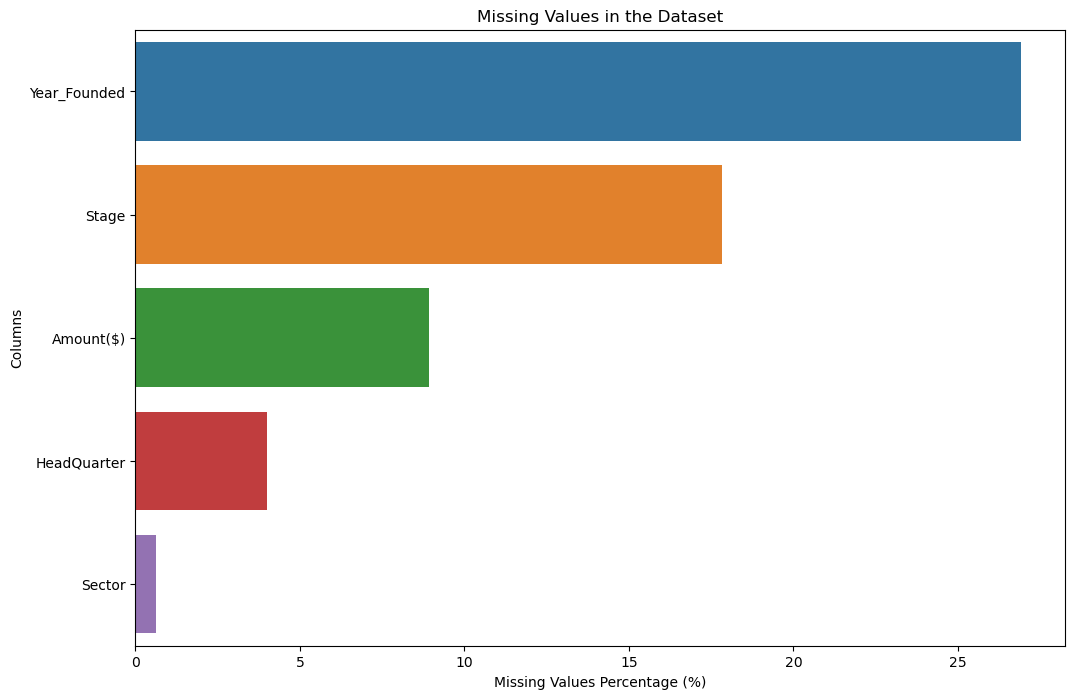

In [72]:
def missing_values_analysis(df):
    na_columns = [col for col in df.columns if df[col].isnull().sum()>0]
    n_miss = df[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_columns].isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=["Missing values", "Ratio"])
    missing_df = pd.DataFrame(missing_df)
    print(missing_df)
    print('~'*100)

    plt.figure(figsize=(12,8))
    ax = sns.barplot(x="Ratio", y=missing_df.index, data=missing_df)
    ax.set(xlabel="Missing Values Percentage (%)", ylabel="Columns",
           title=f"Missing Values in the Dataset")
    
    plt.show()

missing_values_analysis(data)

In [73]:
data.duplicated().sum()

7

In [74]:
# Drop duplicate rows
data.drop_duplicates(inplace=True)

# Check if duplicate rows have been dropped
data.duplicated().sum()

0

In [75]:
def remove_ref(value):
    """
    Removes '#REF!' string from the input value if it's a string.        
    Returns the modified value with '#REF!' removed (if it was present), otherwise the original value.
    """
    if isinstance(value, str):
        value = value.replace('\t#REF!', '').replace('#REF!', '')
    
    return value

data = data.applymap(remove_ref)

### Clean HeadQuarter column

In [76]:
# maintianing first word before comma in the HeadQuarter column
data['HeadQuarter'] = data['HeadQuarter'].apply(str)
data['HeadQuarter'] = data['HeadQuarter'].str.split(',').str[0]
# data['HeadQuarter'] = data['HeadQuarter'].replace("'","",regex=True)

data['HeadQuarter'] = data['HeadQuarter'].str.replace('Bengaluru','Bangalore').str.replace('Banglore','Bangalore')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Gurgaon','Gurugram')
data['HeadQuarter'] = data['HeadQuarter'].str.replace('Computer Games','Unknown').str.replace('Pharmaceuticals','Unknown')

In [77]:
data[data['HeadQuarter']== 'Food & Beverages']


,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,Year_Founded
1903,MasterChow,Hauz Khas,Seed,2021,461000.0,Food & Beverages,2020.0


In [78]:
def swap_values_sector(row):
    undisclosed_keywords = ['Food & Beverages']
    if row['HeadQuarter'] in undisclosed_keywords:
        temp = row['HeadQuarter']
        row['HeadQuarter'] = row['Sector']
        row['Sector'] = temp
    return row

data = data.apply(swap_values_sector, axis=1)

In [79]:
data['Sector'].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

In [80]:
# maintianing first word before comma in the industry column
data['Sector'] = data['Sector'].apply(str)
data['Sector'] = data['Sector'].str.split(',').str[0]
# data['Sector'] = data['Sector'].replace("'","",regex=True)
data['Sector']= data['Sector'].replace('—', 'Unknown')

In [81]:
value_1 = ['Sochcast is an Audio experiences company that give the listener and creators an Immersive Audio experience']
value_2 = ["MoEVing is India's only Electric Mobility focused Technology Platform with a vision to accelerate EV adoption in India."]
value_3 = ["Primary Business is Development and Manufacturing of Novel Healthcare Products in Effervescent forms using imported propriety ingredients."]
data['Sector'] = data['Sector'].replace(value_1, 'Unknown').replace(value_2, 'Unknown').replace(value_3, 'Unknown')

### Grouping the Sector column

1. Technology & Software

2. Banking & Finance

3. Healthcare & Wellness

4. Food & Agriculture

5. Automotive & Transportation

6. Real Estate & Property

7. Consulting, Services & E-Commerce

8. Sports & Leisure

9. Beauty & Fashion

10. Education

11. Energy

12. Other: For other industries not pecified in the above groups.

In [82]:
def group_sector(sector):
    sector = sector.lower()
    sector_keywords = {
        'Technology & Software': ['tech', 'aero', 'aviation', 'apps', 'electronics', 'social', 'platform', 'payments', 'software', 'internet', 'telecommunication', 'information', 'defense', 'purification', 'Augmented', 'cloud'],
        'AI': ['ai'],
        'Banking & Finance': ['funds', 'finan', 'capital', 'banking', 'account', 'insurance', 'credit', 'wealth', 'taxation', 'mortgage', 'venture', 'trad', 'audit'],
        'Healthcare & Wellness': ['health', 'eye', 'cosmetics', 'skin', 'medical', 'bio', 'health', 'medicine', 'wellness'],
        'Food & Agriculture': ['food', 'cook', 'milk', 'dairy', 'nutrition', 'farm', 'fishery', 'beverage', 'agriculture'],
        'Automotive & Transportation': ['auto', 'vehicle', 'transport', 'logistic', 'car ', 'travel'],
        'Real Estate & Property': ['estate', 'construction', 'furniture', 'interior', 'warehouse'],
        'Consulting, Services & E-Commerce': ['consult', 'recruit', 'services', 'marketing', 'resource', 'commerce', 'marketplace'],
        'Sports & Leisure': ['sports', 'arts', 'fitness', 'coaching', 'tourism'],
        'Beauty & Fashion': ['beauty', 'fashion', 'jewellery', 'personal care'],
        'Education': ['education', 'school', 'learn'],
        'Energy': ['energy', 'renewable']
    }
    
    for sector_group, keywords in sector_keywords.items():
        if sector_group == 'AI':
            pattern = re.compile(r'\bAI\b', flags=re.IGNORECASE)
            if pattern.search(sector):
                return 'Technology'
        else:
            if any(keyword in sector for keyword in keywords):
                return sector_group
            
    return 'Other'

# Apply the categorization function to the 'Sector' column
data['Sector_group'] = data['Sector'].apply(group_sector)

# Display the updated DataFrame
data.head(10)



,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,Year_Founded,Sector_group
0,TheCollegeFever,Brand Marketing,Seed,2018,250000.0,Bangalore,NaN,"Consulting, Services & E-Commerce"
1,Happy Cow Dairy,Agriculture,Seed,2018,584000.0,Mumbai,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series A,2018,949000.0,Gurugram,NaN,Banking & Finance
3,PayMe India,Financial Services,Angel,2018,2000000.0,Noida,NaN,Banking & Finance
4,Eunimart,E-Commerce Platforms,Seed,2018,0.0,Hyderabad,NaN,Technology & Software
5,Hasura,Cloud Infrastructure,Seed,2018,1600000.0,Bangalore,NaN,Technology & Software
6,Tripshelf,Internet,Seed,2018,233600.0,Kalkaji,NaN,Technology & Software
7,Hyperdata.IO,Market Research,Angel,2018,730000.0,Hyderabad,NaN,Other
8,Freightwalla,Information Services,Seed,2018,0.0,Mumbai,NaN,Technology & Software
9,Microchip Payments,Mobile Payments,Seed,2018,0.0,Bangalore,NaN,Technology & Software


In [83]:
data['Stage'].fillna('Unknown', inplace=True)

### Grouping the Stage column 

1. Early Stage: Pre-Seed ,Seed, Pre series A, Seed funding, Seed fund, Seed round, Pre-series A, Pre-seed Round, Pre seed Round, Pre series A1, Pre-series C

2. Angel and Grants: Angel,Grant

3. Series (A-H): Series A-1, Series A, Series B, Series C, Series D, Series E, Series F, Series G, Series H, Series B+ Post series A, Series D1

4. Latter Stage: Venture -, Private Equity, Debt Financing, Post-IPO Debt, Post-IPO Equity, Corporate Round, Non-equity Assistance, Funding Round, Fresh funding, Secondary Market, PE
    
5. Unknown: Undisclosed, Venture - Series Unknown, nan,

In [84]:
def group_stage(stage):
    if stage in ['Pre-Seed','Seed','Early seed','Series I','Seed Round','Pre series A','Seed funding','Seed fund','Seed round','Pre-series A','Pre-series A1',
                 'Pre-seed Round','Pre seed Round','Pre series A1','Pre-series C','Pre-seed','Pre-series','Pre- series A','Pre-Series B','Seed A','Seed Funding', 'Seed Round & Series A',
                'Pre Series A','Pre seed round','Pre series B', 'Pre series C', 'Seed Investment', 'Seed+','Pre-series B']:
        return 'Early Stage'
    
    elif stage in ['Angel', 'Grant', 'Angel Round']:
        return 'Angel and Grants'
    
    elif stage in ['Series A-1', 'Series A','Seies A', 'Series A2', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 'Series H',
                   'Series B+', 'Post series A', 'Series D1','Series B2', 'Series E2', 'Series C, D', 'Series F2', 'Series F1', 'Series A+', 'Series B3']:
        return 'Series (A-H)'
    
    elif stage in ['Venture -', 'Private Equity','Debt' ,'Debt Financing', 'Post-IPO Debt', 'Post-IPO Equity',
                   'Corporate Round', 'Non-equity Assistance', 'Funding Round', 'Fresh funding', 'Secondary Market',
                   'PE','Bridge', 'Edge', 'Bridge Round', 'Mid series']:
        return 'Latter Stage'
    
    elif stage in ['Undisclosed','Venture - Series Unknown', 'Upsparks', 'Series Unknown', 'Unknown']:
        return 'Undisclosed'

    else:
        return stage

# Apply the function to the 'Stage' column
data['Stage'] = data['Stage'].apply(group_stage)

# Display the updated DataFrame
data.head()

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,Year_Founded,Sector_group
0,TheCollegeFever,Brand Marketing,Early Stage,2018,250000.0,Bangalore,NaN,"Consulting, Services & E-Commerce"
1,Happy Cow Dairy,Agriculture,Early Stage,2018,584000.0,Mumbai,NaN,Food & Agriculture
2,MyLoanCare,Credit,Series (A-H),2018,949000.0,Gurugram,NaN,Banking & Finance
3,PayMe India,Financial Services,Angel and Grants,2018,2000000.0,Noida,NaN,Banking & Finance
4,Eunimart,E-Commerce Platforms,Early Stage,2018,0.0,Hyderabad,NaN,Technology & Software


In [85]:
data.isna().sum()

Company_Brand      0
Sector             0
Stage              0
Funding_Year       0
Amount($)        255
HeadQuarter        0
Year_Founded     768
Sector_group       0
dtype: int64

### Dealing with Null Values

In [86]:
# Replace 0.0 values with NaN
data['Amount($)'].replace(0.0, np.nan, inplace=True)

data['Amount($)'].fillna(data['Amount($)'].median(), inplace=True)

data['Amount($)'] = data['Amount($)'].apply(lambda x: f'{x:.2f}')

# Clean 'Amount($)' column and convert to numeric dtype
data['Amount($)'] = pd.to_numeric(data['Amount($)'], errors='coerce')


In [87]:
data['Year_Founded'].fillna('Unknown', inplace=True)

In [88]:
data.head()

,Company_Brand,Sector,Stage,Funding_Year,Amount($),HeadQuarter,Year_Founded,Sector_group
0,TheCollegeFever,Brand Marketing,Early Stage,2018,250000.0,Bangalore,Unknown,"Consulting, Services & E-Commerce"
1,Happy Cow Dairy,Agriculture,Early Stage,2018,584000.0,Mumbai,Unknown,Food & Agriculture
2,MyLoanCare,Credit,Series (A-H),2018,949000.0,Gurugram,Unknown,Banking & Finance
3,PayMe India,Financial Services,Angel and Grants,2018,2000000.0,Noida,Unknown,Banking & Finance
4,Eunimart,E-Commerce Platforms,Early Stage,2018,3000000.0,Hyderabad,Unknown,Technology & Software


In [89]:
# define a function to print unique 
def unique_values(df, exclude_columns=None):
    for column in df.columns:
        if exclude_columns and column in exclude_columns:
            continue  # Skip processing the excluded columns
        if df[column].dtype == 'object':
            print(f"Column: {column}")
            column_unique = df[column].unique()
            print(f"{column_unique}")

# Apply the function to the DataFrame excluding preferred columns
columns_to_exclude = ['Company_Brand', 'Sector']
unique_values(data.drop(columns=columns_to_exclude), exclude_columns=columns_to_exclude)


Column: Stage
['Early Stage' 'Series (A-H)' 'Angel and Grants' 'Latter Stage'
 'Undisclosed']
Column: HeadQuarter
['Bangalore' 'Mumbai' 'Gurugram' 'Noida' 'Hyderabad' 'Kalkaji' 'Delhi'
 'India' 'Hubli' 'New Delhi' 'Chennai' 'Mohali' 'Kolkata' 'Pune' 'Jodhpur'
 'Kanpur' 'Ahmedabad' 'Azadpur' 'Haryana' 'Cochin' 'Faridabad' 'Jaipur'
 'Kota' 'Anand' 'Bangalore City' 'Belgaum' 'Thane' 'Margão' 'Indore'
 'Alwar' 'Kannur' 'Trivandrum' 'Ernakulam' 'Kormangala' 'Uttar Pradesh'
 'Andheri' 'Mylapore' 'Ghaziabad' 'Kochi' 'Powai' 'Guntur' 'Kalpakkam'
 'Bhopal' 'Coimbatore' 'Worli' 'Alleppey' 'Chandigarh' 'Guindy' 'Lucknow'
 'nan' 'Telangana' 'Surat' 'Uttar pradesh' 'Rajasthan' 'Tirunelveli'
 'Singapore' 'Gujarat' 'Kerala' 'Frisco' 'California' 'Dhingsara'
 'New York' 'Patna' 'San Francisco' 'San Ramon' 'Paris' 'Plano' 'Sydney'
 'San Francisco Bay Area' 'Bangaldesh' 'London' 'Milano' 'Palmwoods'
 'France' 'Samastipur' 'Irvine' 'Tumkur' 'Newcastle Upon Tyne' 'Shanghai'
 'Jiaxing' 'Rajastan' 'Ludhiana

### Univariate Analysis

Summary Statistics:
count    2.850000e+03
mean     9.855204e+07
std      3.101219e+09
min      8.760000e+02
25%      1.000000e+06
50%      3.000000e+06
75%      8.000000e+06
max      1.500000e+11
Name: Amount($), dtype: float64




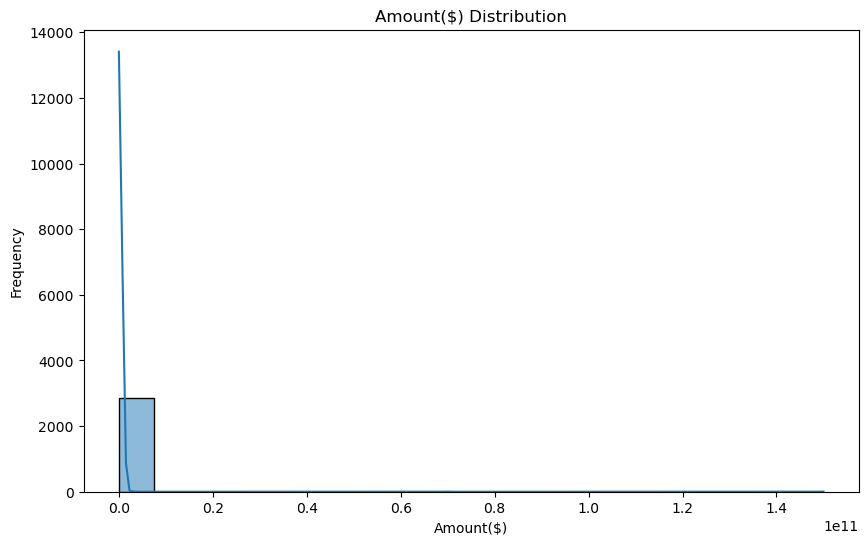

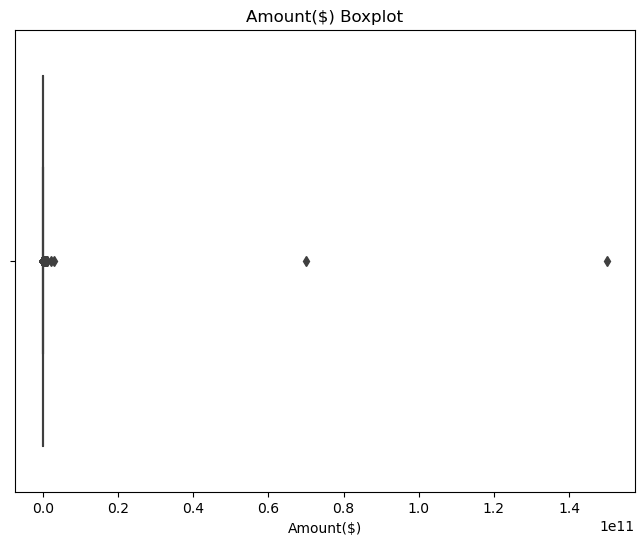

In [90]:
def univariate_analysis(df, column):
    # Summary statistics
    print("Summary Statistics:")
    print(df[column].describe())
    print("\n")
    
    # Histogram
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=20)
    plt.title(f"{column} Distribution")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()
    
    # Boxplot
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"{column} Boxplot")
    plt.xlabel(column)
    plt.show()

univariate_analysis(data, 'Amount($)')

array([[<Axes: title={'center': 'Funding_Year'}>,
        <Axes: title={'center': 'Amount($)'}>]], dtype=object)

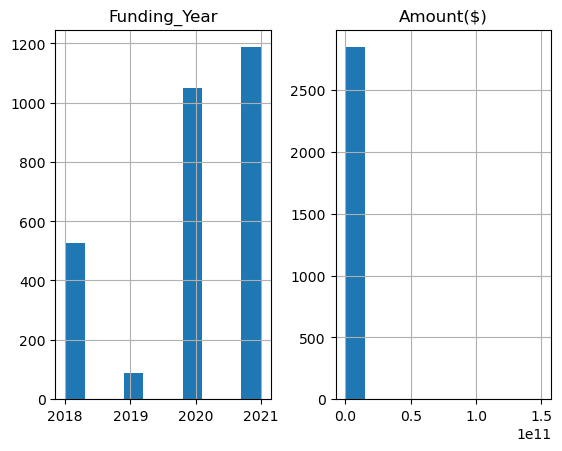

In [91]:
data.hist()

In [92]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Company_Brand,2850,2214,BharatPe,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector,2850,591,FinTech,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Stage,2850,5,Early Stage,1077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Funding_Year,2850.0,NaN,NaN,NaN,2020.016842,1.088436,2018.0,2020.0,2020.0,2021.0,2021.0
Amount($),2850.0,NaN,NaN,NaN,98552035.43193,3101218511.56939,876.0,1000000.0,3000000.0,8000000.0,150000000000.0
HeadQuarter,2850,128,Bangalore,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year_Founded,2850,35,Unknown,768,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sector_group,2850,13,Technology & Software,1062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Answering Research Questions

### Q1. At what stage do most startups receive funding?

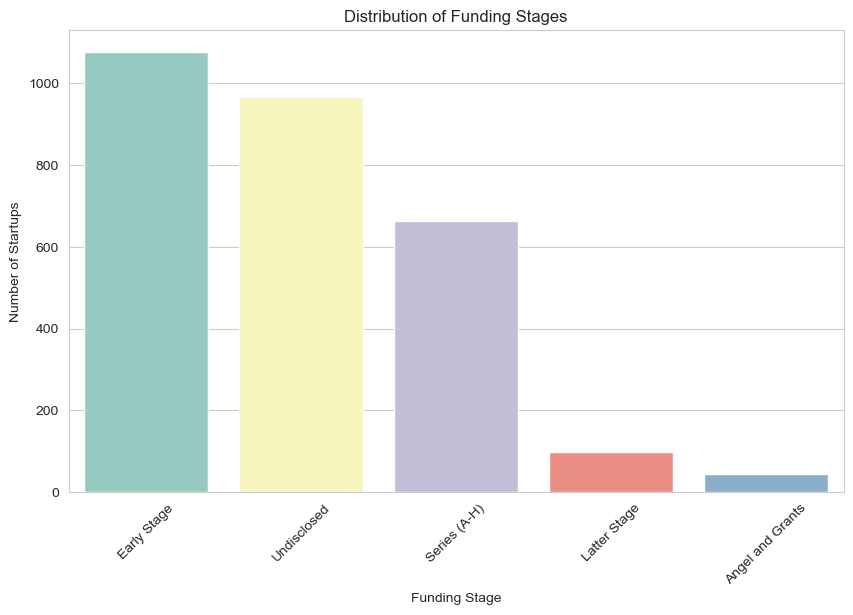

In [93]:
# Set the style
sns.set_style("whitegrid")

# Create the count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Stage', palette='Set3', order=data['Stage'].value_counts().index)
plt.title('Distribution of Funding Stages')
plt.xlabel('Funding Stage')
plt.ylabel('Number of Startups')
plt.xticks(rotation=45)
plt.show()


From the visualization we can see that most startups receive funding at Early Stage while Angel and Grants stage receive the least funding.

### Q2. Which year had the highest amount of startup funding?

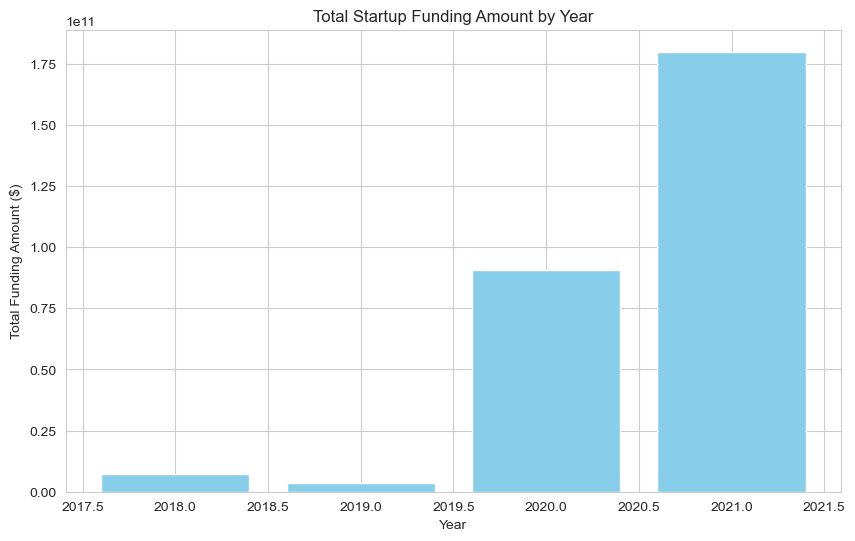

In [94]:
# Group the data by year and calculate the total funding amount for each year
total_funding_by_year = data.groupby('Funding_Year')['Amount($)'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(total_funding_by_year['Funding_Year'], total_funding_by_year['Amount($)'], color='skyblue')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)')
plt.title('Total Startup Funding Amount by Year')


# Show plot
plt.show()


In [95]:
# # Set the style of seaborn plots to "whitegrid"
# sns.set_style("whitegrid")

# # Create a figure with a specific size for the plot
# plt.figure(figsize=(10, 6))

# # Create a bar plot using seaborn's barplot function
# sns.barplot(data, x='Funding_Year', y='Amount($)', palette='Blues_d')

# # Add annotations to each bar in the plot
# for index, row in data.iterrows():
#     # Add text annotation to each bar with the corresponding funding amount
#     plt.text(index, row['Amount($)'], f'{row["Amount($)"]:,.2f}', color='black', ha='center', va='bottom')

# # Set the title of the plot
# plt.title('Total Funding Amount Each Year')

# # Set labels for the x and y axes
# plt.xlabel('Year')
# plt.ylabel('Total Amount ($)')

# # Show the plot
# plt.show()


### Q3. What are the top 3 sectors receiving the highest funding amounts in 2018, 2019, 2020 and 2021?

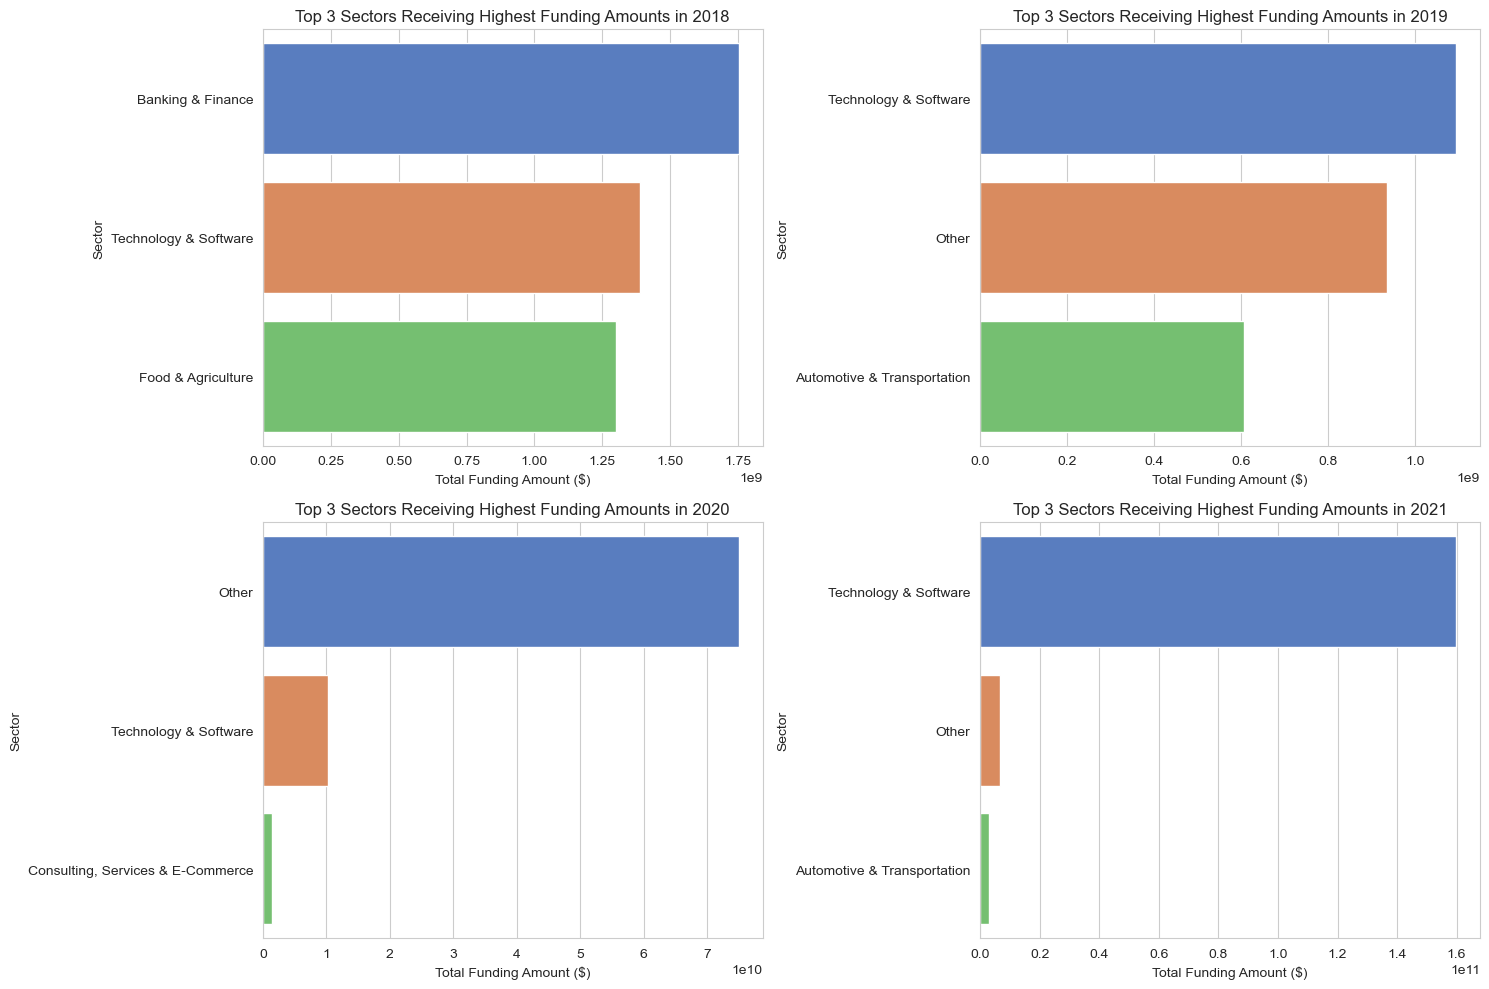

In [96]:
# Create a list to store the top 3 sectors for each year
top_3_sectors_by_year = []

# Iterate through each year
for year in [2018, 2019, 2020, 2021]:
    # Filter the data for the current year
    year_data = data[data['Funding_Year'] == year]
    
    # Aggregate the funding amounts by sector and sum the amounts
    sector_funding = year_data.groupby('Sector_group')['Amount($)'].sum().reset_index()
    
    # Sort the sectors based on total funding amounts in descending order
    sector_funding_sorted = sector_funding.sort_values(by='Amount($)', ascending=False)
    
    # Get the top 3 sectors
    top_3_sectors = sector_funding_sorted.head(3)
    
    # Append the top 3 sectors to the list
    top_3_sectors_by_year.append(top_3_sectors)

# Visualize the top 3 sectors for each year
plt.figure(figsize=(15, 10))

for i, year in enumerate([2018, 2019, 2020, 2021]):
    plt.subplot(2, 2, i + 1)
    sns.barplot(data=top_3_sectors_by_year[i], x='Amount($)', y='Sector_group', palette='muted')
    plt.title(f'Top 3 Sectors Receiving Highest Funding Amounts in {year}')
    plt.xlabel('Total Funding Amount ($)')
    plt.ylabel('Sector')

plt.tight_layout()
plt.show()


### Q4. How does the total funding amount vary over the years?

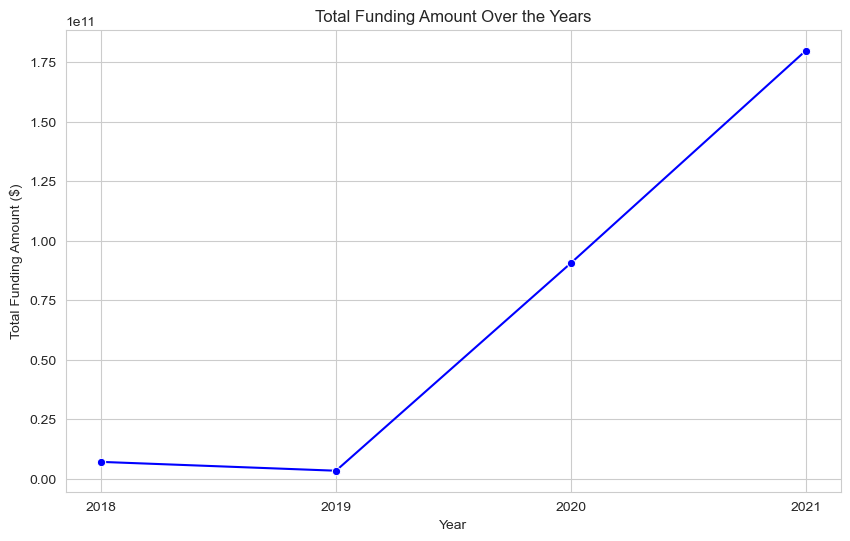

In [97]:
# Group the data by 'Funding_Year' and sum the 'Amount($)' for each year
total_funding_by_year = data.groupby('Funding_Year')['Amount($)'].sum().reset_index()

# Set the style
sns.set_style("whitegrid")

# Create the line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=total_funding_by_year, x='Funding_Year', y='Amount($)', marker='o', color='blue')
plt.title('Total Funding Amount Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount ($)')
plt.xticks(total_funding_by_year['Funding_Year'])  # Ensure all years are displayed on the x-axis
plt.grid(True)
plt.show()


### Q5. What are the top 5 sectors receiving the highest funding amounts?

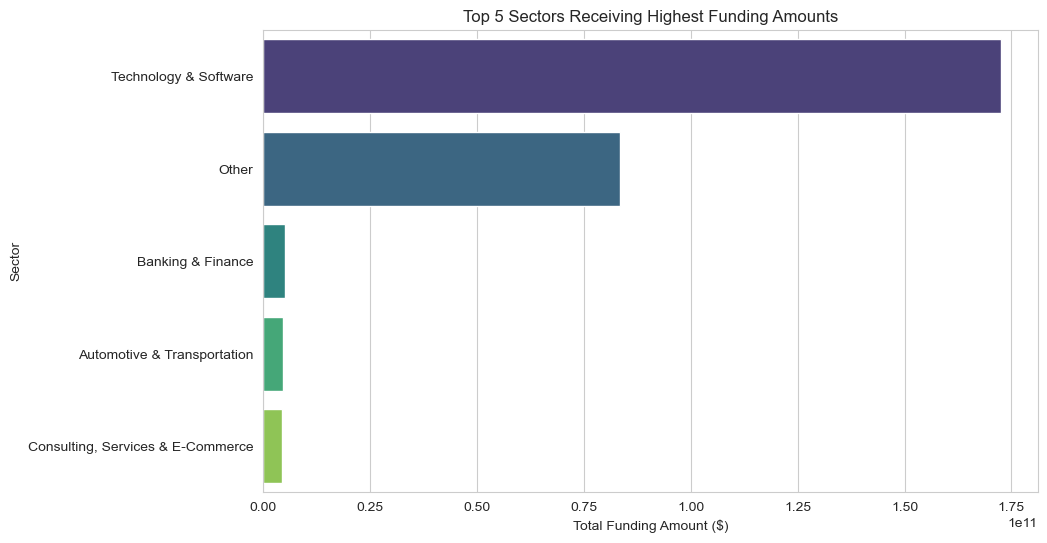

In [98]:
# Aggregate the data by sector and sum the funding amounts
sector_funding = data.groupby('Sector_group')['Amount($)'].sum().reset_index()

# Sort the sectors based on total funding amounts in descending order
sector_funding_sorted = sector_funding.sort_values(by='Amount($)', ascending=False)

# Get the top 5 sectors
top_5_sectors = sector_funding_sorted.head(5)

# Set the style
sns.set_style("whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=top_5_sectors, x='Amount($)', y='Sector_group', palette='viridis')
plt.title('Top 5 Sectors Receiving Highest Funding Amounts')
plt.xlabel('Total Funding Amount ($)')
plt.ylabel('Sector')
plt.show()


## Hypothesis Testing

### Null Hypothesis (H0): There is no significant difference in the average funding amount between the different years.
### Alternative Hypothesis (H1): There is a significant difference in the average funding amount between the different years.

In [99]:
# Subset the data for each year
funding_2018 = data[data['Funding_Year'] == 2018]['Amount($)']
funding_2019 = data[data['Funding_Year'] == 2019]['Amount($)']
funding_2020 = data[data['Funding_Year'] == 2020]['Amount($)']
funding_2021 = data[data['Funding_Year'] == 2021]['Amount($)']

# Perform ANOVA test
f_statistic, p_value = f_oneway(funding_2018, funding_2019, funding_2020, funding_2021)

# Set significance level (alpha)
alpha = 0.05

# Print results
print("ANOVA test results:")
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Check for significance
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average funding amount between different years.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average funding amount between different years.")


ANOVA test results:
F-statistic: 0.26351131914516945
P-value: 0.8517228760474949
Fail to reject the null hypothesis: There is no significant difference in the average funding amount between different years.


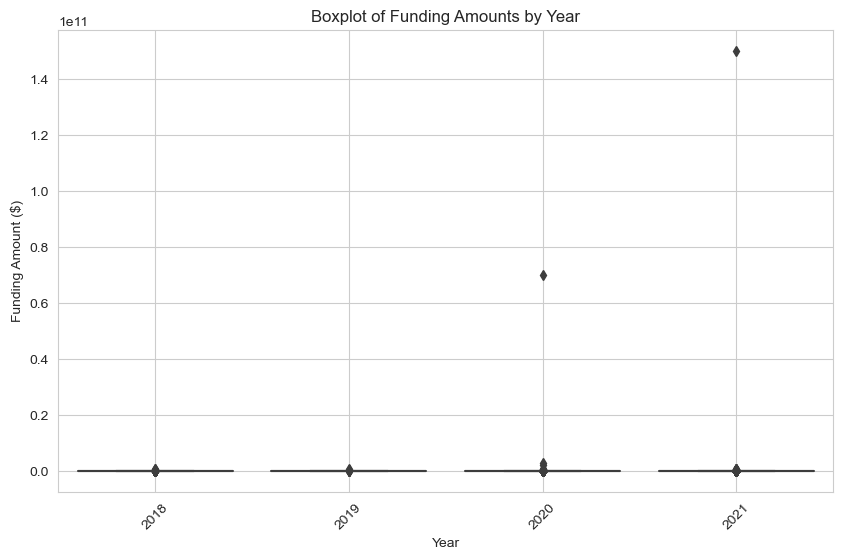

In [100]:
# Create boxplots for each year's funding data
plt.figure(figsize=(10, 6))
sns.boxplot(x='Funding_Year', y='Amount($)', data=data)
plt.title('Boxplot of Funding Amounts by Year')
plt.xlabel('Year')
plt.ylabel('Funding Amount ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# Conclusion

Based on the ANOVA test results, we obtained an F-statistic of approximately 0.264 and a p-value of approximately 0.852.

Since the p-value (0.852) is greater than the chosen significance level (alpha = 0.05), we fail to reject the null hypothesis. This means that there is insufficient evidence to conclude that there is a significant difference in the average funding amount between different years.

In simpler terms, the data does not provide enough evidence to support the claim that the average funding amount varies significantly across the years 2018, 2019, 2020, and 2021. Therefore, we cannot attribute any observed differences in funding amounts to the year in which the funding occurred.

This conclusion suggests that other factors besides the year may be influencing the funding amounts in the dataset. Further investigation may be needed to identify and understand these factors. Additionally, it's essential to recognize the limitations of the ANOVA test and consider other analytical approaches or factors that may influence funding amounts.